# El mecanismo de Atención

El mecanismo de atención está en el corazón del los Transformers.

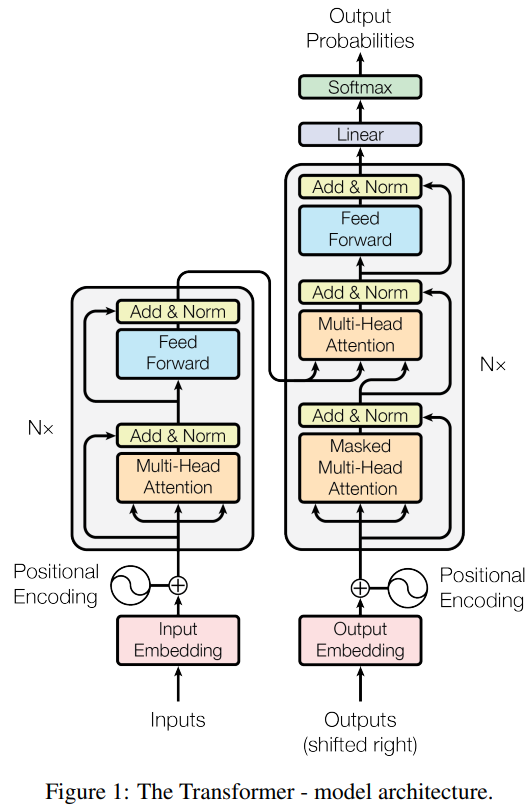
ref: https://arxiv.org/abs/1706.03762v7

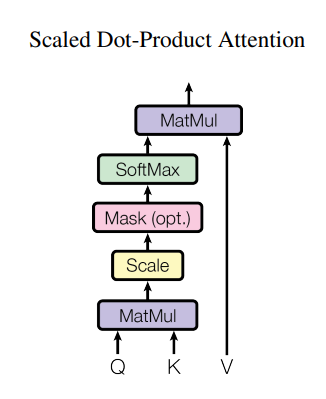

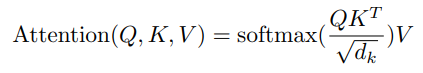

Implemetemos Scale Multiplicative Self Attention!!!    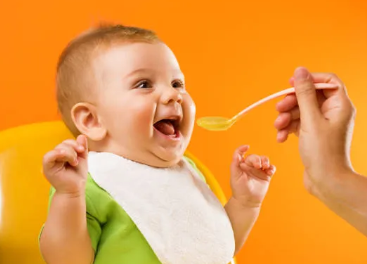

In [1]:
import torch
import torch.nn as nn
from torch.nn import functional as F

In [2]:
torch.manual_seed(42)
context_size = 8   # <-- d_k en el paper
emb_d = 32        # <-- 
head_size = 16   # <-- hyperparameter en el mechanismo de atención 

x = torch.randn(context_size, emb_d)

In [3]:
x.shape

torch.Size([8, 32])

In [4]:
key = nn.Linear(emb_d, head_size, bias=False)
query = nn.Linear(emb_d, head_size, bias=False)
value = nn.Linear(emb_d, head_size, bias=False)

In [ ]:
#  (8 * 32) @ (32 * 16) --> 8 * 16

In [5]:
k = key(x)
q = query(x)
v = value(x)

In [10]:
q.shape, k.shape

(torch.Size([8, 16]), torch.Size([8, 16]))

In [22]:
weights = q @ k.T * context_size ** -.5

In [23]:
weights.shape

torch.Size([8, 8])

In [24]:
weights = F.softmax(weights, dim=-1)

In [25]:
weights

tensor([[0.0600, 0.1994, 0.0525, 0.2421, 0.0779, 0.2070, 0.0691, 0.0919],
        [0.0841, 0.0813, 0.0532, 0.1198, 0.0777, 0.3362, 0.1076, 0.1402],
        [0.0949, 0.1022, 0.0502, 0.1727, 0.1787, 0.1100, 0.0943, 0.1970],
        [0.1098, 0.1129, 0.0984, 0.1111, 0.0851, 0.1850, 0.1635, 0.1342],
        [0.1466, 0.0738, 0.1472, 0.1124, 0.0713, 0.1980, 0.1677, 0.0831],
        [0.0538, 0.0750, 0.0822, 0.0906, 0.0550, 0.4246, 0.1273, 0.0914],
        [0.0402, 0.0680, 0.0658, 0.1026, 0.1635, 0.1933, 0.0812, 0.2854],
        [0.1326, 0.2945, 0.1182, 0.0808, 0.1081, 0.0791, 0.1059, 0.0808]],
       grad_fn=<SoftmaxBackward0>)

In [26]:
out = weights @ v

In [27]:
out.shape

torch.Size([8, 16])

In [28]:
out

tensor([[ 0.1554, -0.0044,  0.2840, -0.2357,  0.2205,  0.1362,  0.2419, -0.3230,
         -0.2432,  0.1794, -0.2948, -0.1831,  0.0406,  0.0022, -0.0725, -0.0309],
        [ 0.1053,  0.1033,  0.3122, -0.1599,  0.0946,  0.0509,  0.3413, -0.3533,
         -0.1584,  0.1285, -0.2571, -0.0379, -0.1294,  0.1252, -0.1723,  0.0610],
        [ 0.0083,  0.0903,  0.2253, -0.1663,  0.0203,  0.0265,  0.1836, -0.1306,
         -0.0410,  0.1219, -0.2807, -0.0707, -0.2997, -0.0193, -0.0026, -0.0522],
        [-0.0157,  0.1045,  0.2909, -0.0770,  0.0933,  0.0035,  0.1860, -0.2337,
         -0.1615,  0.1156, -0.3986, -0.0521, -0.2907,  0.0344, -0.1015, -0.0219],
        [-0.0483,  0.1509,  0.3016, -0.0052,  0.0939, -0.1157,  0.1130, -0.2311,
         -0.2077,  0.1194, -0.4530, -0.0672, -0.3795,  0.0516, -0.1146, -0.0576],
        [ 0.1248,  0.0846,  0.3907, -0.1154,  0.1075, -0.0016,  0.3756, -0.4088,
         -0.1911,  0.1156, -0.2956, -0.0311, -0.0665,  0.2057, -0.2515,  0.1158],
        [-0.0462,  0.1

In [36]:
class AttentionHead(nn.Module):
    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(emb_d, head_size, bias=False)
        self.query = nn.Linear(emb_d, head_size, bias=False)
        self.value = nn.Linear(emb_d, head_size, bias=False)
        #self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))
        #self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        T, C = x.shape
        k = self.key(x)
        q = self.query(x)
        wei = q @ k.T * C **-.5
        #wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        wei = F.softmax(wei, dim=-1)
        #wei = self.dropout(wei)
        v = self.value(x)
        out = wei @ v
        return out

In [37]:
A = AttentionHead(16)

In [42]:
list(A.parameters())

[Parameter containing:
 tensor([[ 0.1741, -0.1615,  0.1643, -0.1390, -0.0429, -0.0724, -0.0946,  0.0629,
           0.1025, -0.1161, -0.0823,  0.0902, -0.0214,  0.0431,  0.0924, -0.0653,
          -0.0981,  0.0651, -0.0647, -0.1177, -0.0892, -0.0822,  0.1760,  0.0340,
           0.0761,  0.0237, -0.1192,  0.1276, -0.0275, -0.0458,  0.1441, -0.0901],
         [ 0.0359, -0.1504,  0.0906,  0.0702, -0.1454,  0.0987,  0.0195, -0.0913,
           0.1507,  0.0759,  0.0621, -0.0657, -0.0969, -0.0951,  0.0664,  0.0476,
          -0.1058,  0.1609,  0.1030, -0.0675,  0.0915, -0.0749,  0.0555,  0.1471,
          -0.1564, -0.0879, -0.0100,  0.0264, -0.1454, -0.1163, -0.0169, -0.0255],
         [ 0.0381,  0.0225,  0.0363,  0.0117,  0.0203, -0.0102,  0.0635,  0.1206,
          -0.0882, -0.0916,  0.0776, -0.1278,  0.1149,  0.0817,  0.0256, -0.0767,
           0.0053, -0.1398, -0.1590,  0.1665, -0.1586, -0.1467, -0.0687,  0.0099,
           0.0405, -0.0871, -0.0172, -0.0395,  0.1479,  0.1534,  0.0727, 

In [39]:
A(x)

tensor([[ 0.0555, -0.0878,  0.1248, -0.1485,  0.1353,  0.1962, -0.0820, -0.0007,
         -0.0228,  0.4761,  0.1729,  0.4763,  0.0038,  0.0350,  0.2854,  0.1734],
        [ 0.0822, -0.0827,  0.1483, -0.2389,  0.0725,  0.2796, -0.0874,  0.0156,
          0.0255,  0.4999,  0.1979,  0.4982,  0.0468,  0.0579,  0.2796,  0.1596],
        [ 0.0718, -0.1068,  0.1313, -0.0760,  0.1869,  0.1353, -0.0847, -0.0203,
         -0.0232,  0.4709,  0.1823,  0.4526, -0.0242,  0.0041,  0.2981,  0.1625],
        [ 0.1177, -0.0682,  0.1358, -0.2502,  0.0815,  0.2660, -0.1309,  0.0539,
          0.0935,  0.4868,  0.2357,  0.4539,  0.0161,  0.0652,  0.2761,  0.1390],
        [ 0.0892, -0.1056,  0.1601, -0.2236,  0.0835,  0.2807, -0.0549, -0.0245,
          0.0079,  0.5046,  0.1848,  0.5208,  0.0663,  0.0245,  0.2863,  0.1813],
        [ 0.1138, -0.0856,  0.0617, -0.0836,  0.2500,  0.1225, -0.2234,  0.0760,
          0.1025,  0.4423,  0.1292,  0.4281,  0.0342,  0.1403,  0.2574,  0.1316],
        [ 0.0866, -0.1